In [1]:
# ps the following codes used below are not all mine

The normalized least-mean-squares(NLMS) adaptive filter is an extension of the  LMS adaptive filter.
The extension is based on normalization of learning rate.
The learning rage :math:`\mu` is replaced by learning rate :math:`\eta(k)`
normalized with every new sample according to input power as follows


In [2]:
import numpy as np
import matplotlib.pylab as plt
import math

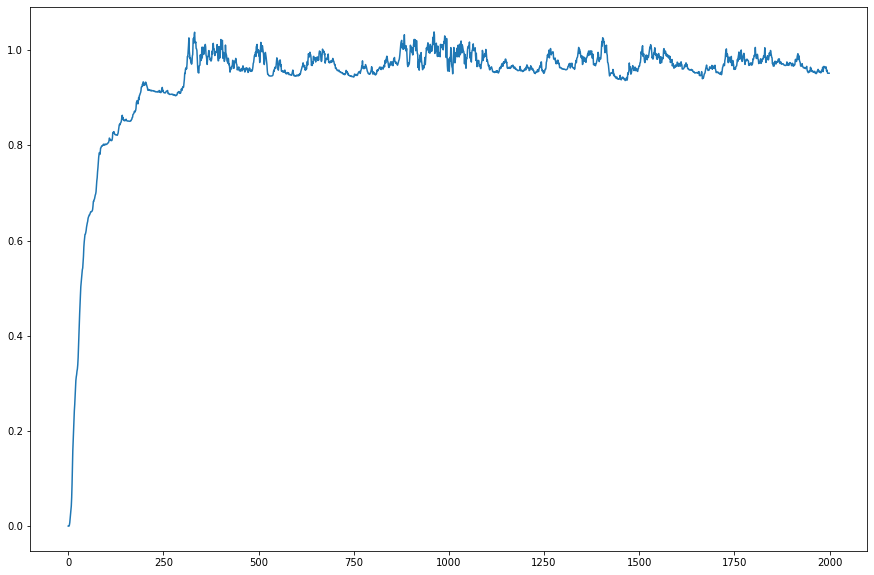

In [3]:
noDP=2000   # Define the number of data points
N = 2000
numberOfRuns=100          # The higher the number of runs, the smoother the result
ar=-0.99                   # AR paramter
NVariance=0.936       # The variance of the system noise given in the problem
mu=0.001                  # LMS learning rate parameter
mean = 0                     # Define the mean
fb = list(range(0,500))
NoiseStandardDeviation=math.sqrt(NVariance) 
weight=np.zeros((noDP,1))
datastream=np.zeros((noDP,1)) #Allocate memory for input data stream
error=np.zeros((noDP,1)) # Allocate memory for error between prediction and resutls
mse=np.zeros((noDP,1))

 
for k in range (0,numberOfRuns): #Loop for performing the appropriate number of Monte Carlo simulations
    datastream[0]=0         #initial input to zero
    weight[0]=0         #Initialize the weights back to zero
    
    for n in range(1 , noDP-1):# The loop that does the data runs and filter updates
 
        datastream[n]=-ar*datastream[n-1]+np.random.normal(mean,NoiseStandardDeviation) # update input data 
        error[n]=datastream[n]-weight[n]*datastream[n-1] # calculate the error in estimation
        weight[n+1]=weight[n]+mu*datastream[n-1]*error[n] # update the weights
        
    
    mse=mse+(error**2)              #accumulate squared error of estimation

 

mse=mse/numberOfRuns            # normalize the accumulated error to reflect the average error based on the number of monte Carlo simulations completed
fig = plt.figure(figsize=(15,10))
plt.plot(weight)

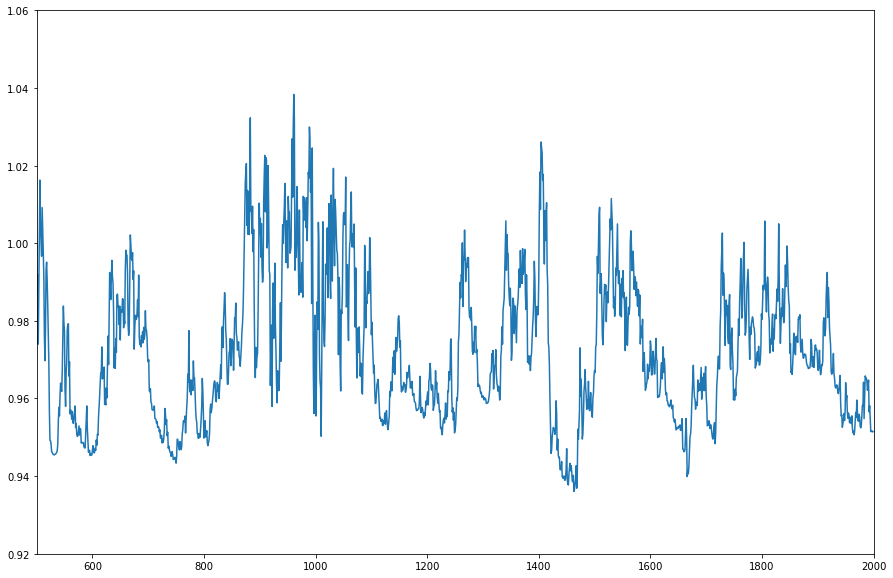

In [4]:
fig = plt.figure(figsize=(15,10))
plt.plot(weight)
plt.xlim(500,2000)
plt.ylim(0.92,1.06)
plt.show()

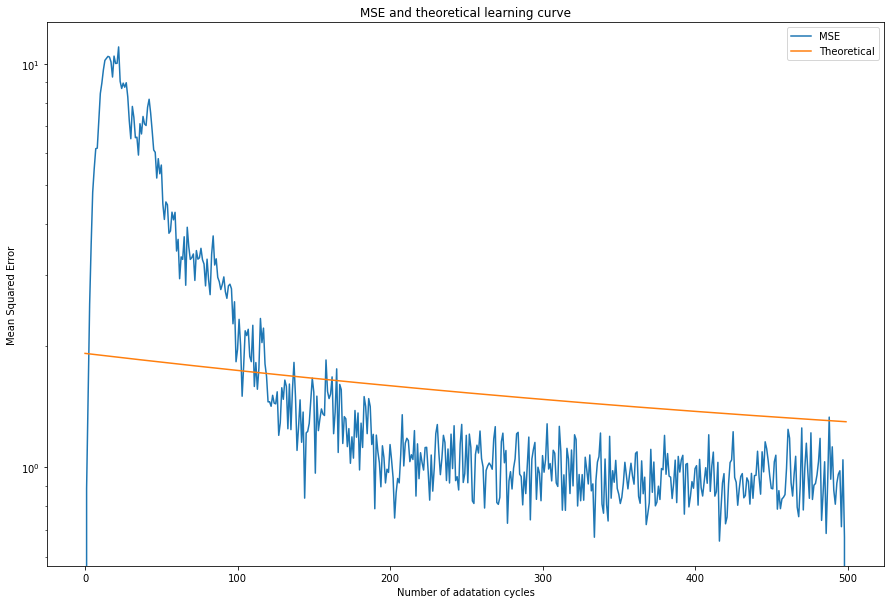

In [5]:
noDP=500 # Define the number of data points
N = 500
numberOfRuns=100       # for a smooter run the number can be increased

 

ar=-0.99                #AR paramter
NVariance=0.936   # the variance noise in the problem
mu=[0.001]                #learning rate parameter
n = np.arange(0, N, 1)                 

 

NoiseStandardDeviation=math.sqrt(NVariance) 

 

datastream=np.zeros((noDP,1)) #Assign memmory for the input data stream
error=np.zeros((noDP,1)) # Allocate memory for error between prediction and results
mse=np.zeros((noDP,1)) # Allocate memory of squared averaged error
J = np.zeros((noDP, len(mu))) # preallocate a matrix for learning curve J values
for m in range(0, len(mu)):  # loop for different values of step-size mu
    
    # calculate learning curve J
    for n in range(0, noDP):
        J[n, m] = NVariance*(1+mu[m]*0.5) + (ar**2 - mu[m]*0.5*NVariance)*(1-mu[m])**(2*n)
        
    
    # Preallocate MSE
    mse = np.zeros((noDP, 1)) # allocate memory for sum of squared errors
 

 

    for k in range (1,numberOfRuns): #Loop for performing the appropriate number of Monte Carlo simulations
        datastream = np.zeros((noDP, 1))   # allocate memory for input data stream
        weight = np.zeros((noDP, 1))  # allocate memory for weight1 estimates
        error=np.zeros((noDP,1)) # Allocate memory for error between prediction and resutls

 

        for n in range(1 , noDP-1):# The loop that does the data runs and filter updates

 

            datastream[n]=-ar*datastream[n-1]+np.random.normal(m,NoiseStandardDeviation,1)[0] # update input data 
            error[n]=datastream[n]-weight[n-1]*datastream[n-1] # calculate the error in estimation
            weight[n]=weight[n-1]+mu[m]*datastream[n-1]*error[n] # update the weights
        
        

 

        mse=mse+(error**2)             #accumulate squared error of estimation

 

    mse=mse/numberOfRuns           # normalize the accumulated error to reflect the average error based on the number of monte Carlo simulations completed

 

# Plot MSE and J over time
fig = plt.figure(figsize=(15,10))
#bx = fig.add_subplot(2,1,2)   
plt.semilogy(range(0,noDP), mse, label='MSE') 
plt.semilogy(range(0,noDP), J[:, m], label='Theoretical')
plt.title('MSE and theoretical learning curve')
plt.xlabel('Number of adatation cycles')    
plt.ylabel('Mean Squared Error')      
plt.axhline(0, color='gray')
plt.legend(loc='upper right')

# Chapter 7 problem 10

#  we revisit the computer experiment described in Problem 18 of Chapter 6.
# AR is given
# u1n2 = -a1u1n - 12 - a2u1n - 22 + v1n2
# a1 = 0.1 and a2 = - 0.8.
# v(n) is white noise with zero mean and a variance chosen to make the variance of u(n) equal to unity

In [12]:
# parameters
a1 = 0.1
a2 = -0.8
mu = [0.2,0.2,0.2]   # LMS step-size parameter
d = [0.5, 0.25,0.75]  #Deltas for Normalising
sim = 200
NIterations = 1000 # number of steps in time
nor = 10  # number fo monte carlos simulations
NoiseVariance = ((1*((1+a2)**2 - a1**2))/((1+a2)/(1-a2))) # variance of the system noise
NoiseStandardDeviation = np.sqrt(NoiseVariance) 

J = np.zeros((NIterations, len(mu))) # preallocate a matrix for learning curve J values


In [15]:
for m in range(0, len(mu)):  # loop for different values of step-size mu
    
    # calculate learning curve J
    for n in range(0, NIterations):
        J[n, m] = NoiseVariance*(1+mu[m]*0.5) + (a1**2 - mu[m]*0.5*NoiseVariance)*(1-mu[m])**(2*n)
        
        # Preallocate MSE
    MSE = np.zeros((NIterations, 1)) # allocate memory for sum of squared errors
       

In [17]:
 for k in range(1, numberOfRuns):        # loop for Monte Carlo simulations

        u = np.zeros((NIterations, 1))   # allocate memory for input data stream
        w1 = np.zeros((NIterations, 1))  # allocate memory for weight1 estimates
        w2 = np.zeros((NIterations, 1))  # allocate memory for weight2 estimates

        e1 = np.zeros((NIterations, 1))  # allocate memory for e1 estimates
        w2 = np.zeros((NIterations, 1))  # allocate memory for e2 estimates
        e2 = np.zeros((NIterations, 1))
        f = np.zeros((NIterations, 1))   # allocate memory for prediction error
        

In [23]:
  for n in range(1, NIterations):  # do filter and weight updates
            # calculate new input sample:
            u[n] = -a1*u[n-1] - a2*u[n-2] + np.random.normal(0, NoiseStandardDeviation, 1)[0]
            # calculate estimation error (basic FIR filter operation) :
            f[n] = u[n] - w1[n-1]*u[n-1] - w2[n-1]*u[n-2]
            # calculate weight update according to Normalised LMS algorithm
            w1[n] = w1[n-1] + (mu[m]/(d[m]+(abs(u[n]))**2))*u[n-1]*f[n]
            w2[n] = w2[n-1] + (mu[m]/(d[m]+(abs(u[n]))**2))*u[n-2]*f[n]
            # calculation of tap weight errors
            e1[n] = -a1 - w1[n]
            e2[n] = -a2 - w2[n]
        
            MSE = MSE + f**2# accumulate squared estimation errors
            MSE = MSE/nor # Calculate average MSE over all simulations

# A). Plot the learning curve of the normalized LMS algorithm used to estimate the AR parameters a1 and a2.

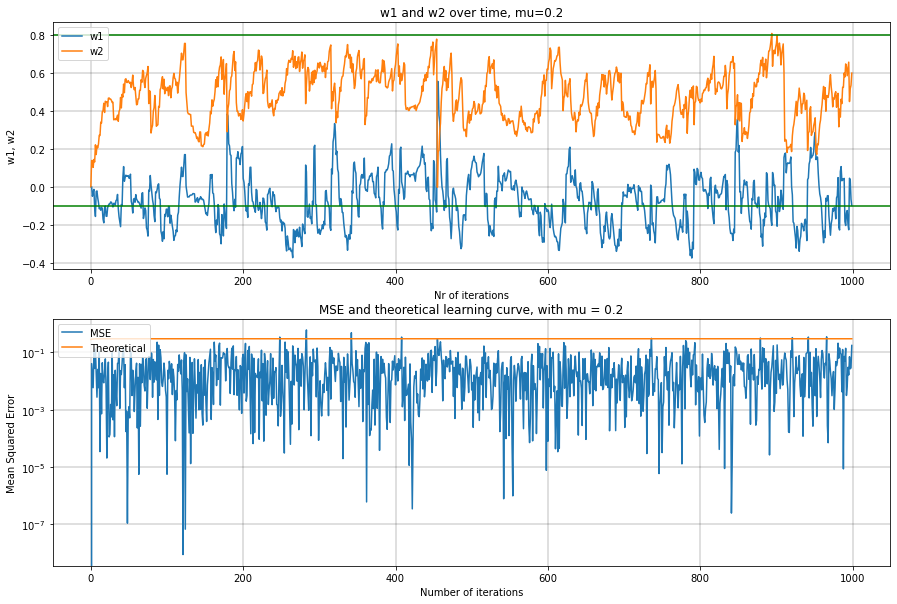

In [27]:
fig = plt.figure(figsize=(15,10))          
ax = fig.add_subplot(2,1,1)
    
# Plot weight values over time
ax.plot(range(0,NIterations), w1, label='w1')    
ax.plot(range(0,NIterations), w2,  label='w2')     
ax.set_title('w1 and w2 over time, mu={}'.format(mu[m]))
ax.set_xlabel('Nr of iterations')      
ax.set_ylabel('w1, w2') 
ax.grid(color='black', linestyle='-', linewidth=0.25)
ax.axhline(0.8, color='green')
ax.axhline(-0.1, color='green')
plt.legend(loc='upper left')
    
    # Plot MSE and J over time
bx = fig.add_subplot(2,1,2)   
bx.semilogy(range(0,NIterations), MSE, label='MSE') 
bx.semilogy(range(0,NIterations), J[:, m], label='Theoretical')
bx.set_title('MSE and theoretical learning curve, with mu = {}'.format(mu[m]))
bx.set_xlabel('Number of iterations')    
bx.set_ylabel('Mean Squared Error')      
bx.grid(color='black', linestyle='-', linewidth=0.25)
bx.axhline(0, color='gray')
plt.legend(loc='upper left')
    
    

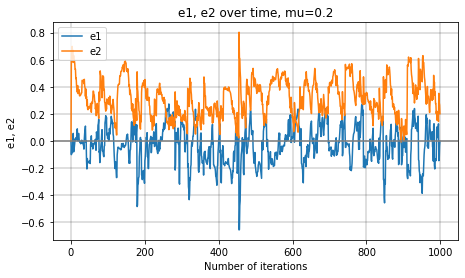

In [30]:
fig2 = plt.figure(figsize=(16, 4))
# Plot e1 and e2 over time
cx = fig2.add_subplot(1,2,1)
cx.plot(range(0,NIterations), e1, label='e1')
cx.plot(range(0,NIterations), e2, label='e2')
cx.axhline(0, color='gray')
cx.set_title('e1, e2 over time, mu={}'.format(mu[m]))
cx.set_xlabel('Number of iterations')      
cx.set_ylabel('e1, e2')
cx.grid(color='black', linestyle='-', linewidth=0.25)
plt.legend(loc='upper left')
    